In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import termios
import tty

import pybullet as p

from physics_env import PushEnv

In [2]:
PYBULLET_CONNECTION_MODE = os.environ.get("PYBULLET_CONNECTION_MODE", "gui")

In [6]:
env = PushEnv(assets_root="/home/weirdlab/projects/pybullet/pomdp-baselines/envs/tabletop/assets", vis_obs=True)
obs = env.reset()

creating animated png, please about 5 seconds
CPU times: user 1.29 s, sys: 0 ns, total: 1.29 s
Wall time: 1.29 s
CPU times: user 317 µs, sys: 0 ns, total: 317 µs
Wall time: 203 µs


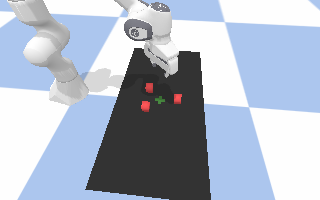

In [19]:
from numpngw import write_apng
from IPython.display import Image

camTargetPos = [0.5, 0, 0]
yaw = 0
frames=[] #frames to create animated png
for r in range(60):
    yaw += 6
    pitch = -50.0
    roll = 0
    upAxisIndex = 2
    camDistance = 1.
    pixelWidth = 320
    pixelHeight = 200
    nearPlane = 0.01
    farPlane = 100
    fov = 60
    viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                roll, upAxisIndex)
    aspect = pixelWidth / pixelHeight
    projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)
        
    img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
    w = img_arr[0]  #width of the image, in pixels
    h = img_arr[1]  #height of the image, in pixels
    rgb = img_arr[2]  #color data RGB
    dep = img_arr[3]  #depth data
    #print("w=",w,"h=",h)
    np_img_arr = np.reshape(rgb, (h, w, 4))
    frame = np_img_arr[:, :, :3]
    frames.append(frame)
print("creating animated png, please about 5 seconds")
%time write_apng("example6.png", frames, delay=100)
%time Image(filename="example6.png")